In [1]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
import math

In [2]:
conditions = ['OSM1', 'EGF1', 'EGF+TGFB1', 'TGFB1', 'PBS1', 
              'OSM2', 'EGF2', 'EGF+TGFB2', 'TGFB2', 'PBS2',
              'OSM+EGF+TGFB', 'OSM+EGF', 'OSM+TGFB']
conditions = np.array(conditions)
# Assuming 'n_conds' dynamically reflects the loaded data
n_conds = conditions.size

# Calculate rows and columns for subplots dynamically
# rows = round(math.sqrt(n_conds)); cols = math.ceil(n_conds / rows)
rows = 3
cols = 5

In [3]:
cc_path = '/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/dcompCCtraj_states/'
#file_info = 'ccTrjsDcomp_MacStatesLI204601_P_tl40Awells0_Apr03-2024_nS4'
#file_info = 'ccTrjsDcomp_MacStatesLI204601_P_tl40AllWells_Apr09-2024_nS20'
file_info = 'ccTrjsDcomp_MacStatesLI204601_P_tl40AllWells_Apr06-2024_nS7'
filename = cc_path+file_info+'.npz'
if filename:
   # Loading the saved data
   data = np.load(filename, allow_pickle=True)
   cc_values_by_macrostate = data['cc_vals_by_macrostate'].item()

In [4]:
combined_values_by_state = {}
for condition, states in cc_values_by_macrostate.items():
    for state, values in states.items():
        if state not in combined_values_by_state:
            combined_values_by_state[state] = []
        combined_values_by_state[state].extend(values)

# Plotting the combined KDEs for each state
fig, ax = plt.subplots(figsize=(8, 6))
for state, values in combined_values_by_state.items():
    if len(values) > 0:
        kde = gaussian_kde(values)
        x_range = np.linspace(min(values), max(values), 1000)
        ax.plot(x_range, kde(x_range), label=f'State {state}')

        # Optional: plotting mean point and line
        mean_x = np.mean(values)
        mean_y = kde(mean_x)
        ax.plot(mean_x, mean_y, 'o', color='k')
        ax.axvline(mean_x, color='k', linestyle='--', alpha=0.7)

ax.legend(title='Combined States')
ax.set_xlabel('CC Values')
ax.set_ylabel('Density')
plt.tight_layout()
plt.show()
#plt.savefig(file_info+'avgKde.png', bbox_inches='tight', dpi=500)
#plt.close()

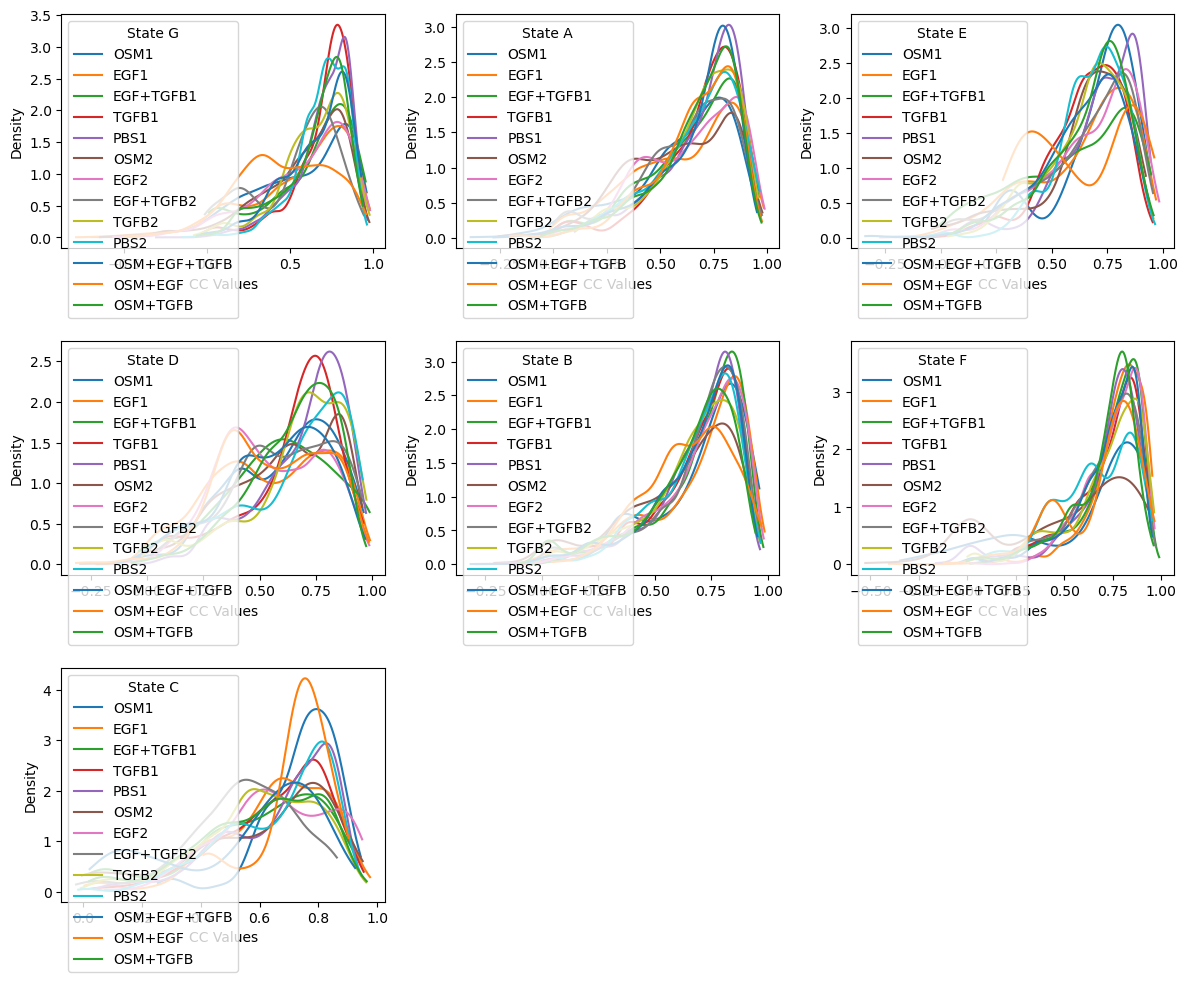

In [8]:
# Extract all unique states from cc_values_by_macrostate
unique_states = set(state for macrostates in cc_values_by_macrostate.values() for state in macrostates)

rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 10), squeeze=False)
axs = axs.flatten()

# Iterate over states and plot data for each condition
for state_index, state in enumerate(unique_states):
    ax = axs[state_index]
    
    for condition, macrostates in cc_values_by_macrostate.items():
        if state in macrostates and len(macrostates[state]) > 0:  # Ensure there are values to plot
            values = macrostates[state]
            kde = gaussian_kde(values)
            x_range = np.linspace(min(values), max(values), 1000)
            ax.plot(x_range, kde(x_range), label=f'{conditions[condition]}')
            """
            mean_x = np.mean(values)
            mean_y = kde(mean_x)
            ax.plot(mean_x, mean_y, 'o', color='k')
            ax.axvline(mean_x, color='k', linestyle='--', alpha=0.7)
            """
    ax.legend(title=f'State {state}')
    ax.set_xlabel('CC Values')
    ax.set_ylabel('Density')

# Hide unused subplots
for empty_ax in axs[len(unique_states):]:
    empty_ax.set_visible(False)
    
plt.tight_layout()
plt.show()


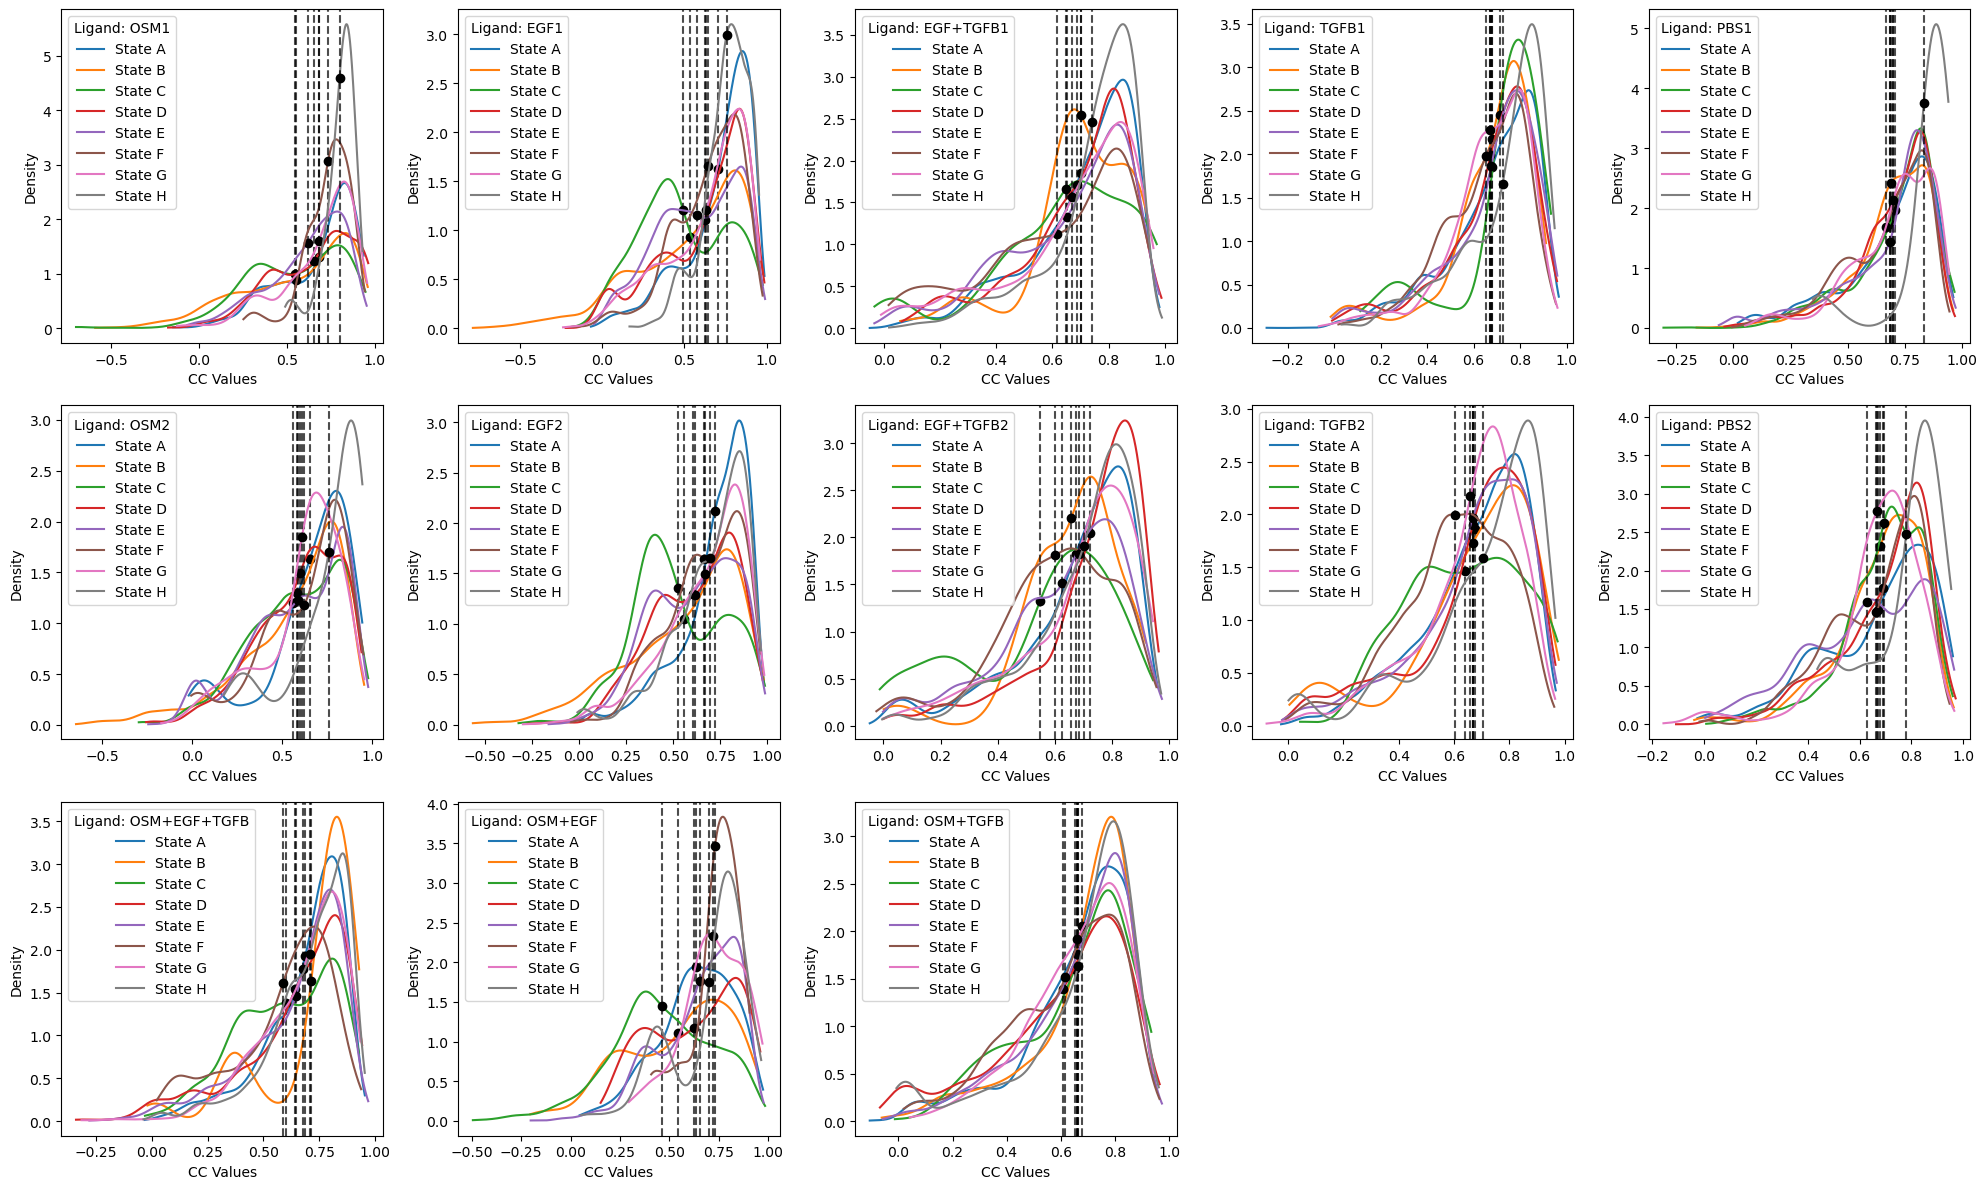

In [4]:
# Create subplot grid: State Decomposition for each Ligand Condition 
fig, axs = plt.subplots(rows, cols, figsize=(20, 12), squeeze=False)
axs = axs.flatten()

# Iterate over conditions and states to plot data
for model_index, (condition, macrostates) in enumerate(cc_values_by_macrostate.items()):
    ax = axs[model_index]
    
    for state, values in macrostates.items():
        if len(values) > 0:  # Ensure there are values to plot
            kde = gaussian_kde(values)
            x_range = np.linspace(min(values), max(values), 1000)
            ax.plot(x_range, kde(x_range), label=f'State {state}')
            
            mean_x = np.mean(values)
            mean_y = kde(mean_x)
            ax.plot(mean_x, mean_y, 'o', color='k')
            ax.axvline(mean_x, color='k', linestyle='--', alpha=0.7)
    
    ax.legend(title=f'Ligand: {conditions[condition]}')
    ax.set_xlabel('CC Values')
    ax.set_ylabel('Density')

# Hide unused subplots
for empty_ax in axs[n_conds:]:
    empty_ax.set_visible(False)

plt.tight_layout()
plt.show()
#plt.savefig(file_info+'.png', bbox_inches='tight', dpi=500)

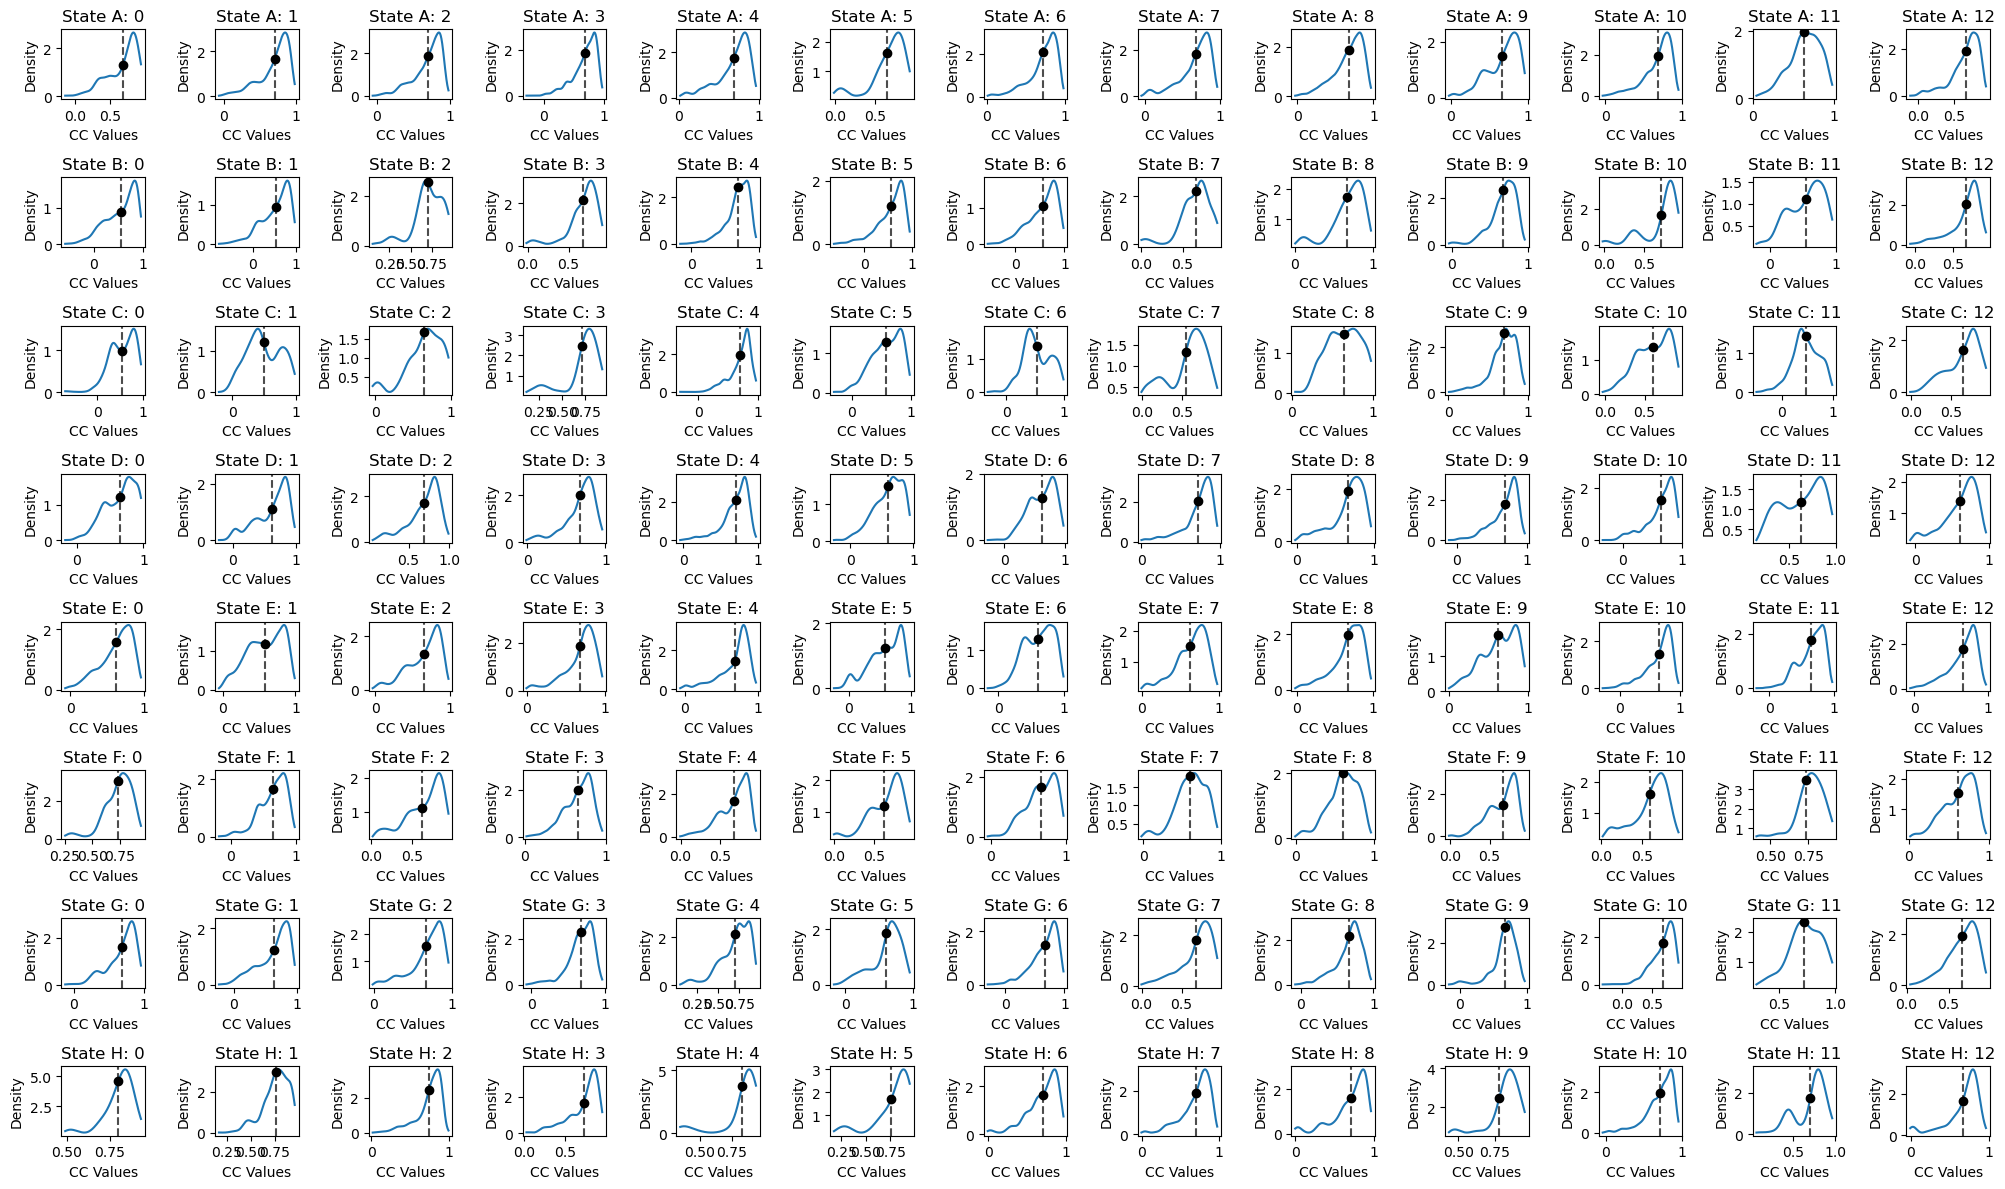

In [23]:
#fig, axs = plt.subplots(3, 3, figsize=(20, 12), squeeze=False)
#axs = axs.flatten()

sample_condition = next(iter(cc_values_by_macrostate.values()))
n_states = len(sample_condition)  # Number of states
n_conditions = len(cc_values_by_macrostate)  # Number of conditions

# Setup for subplots - one row per state, each column represents a condition
rows = n_states  # One row per state
cols = n_conditions  # One column per condition, adjust as necessary

fig, axs = plt.subplots(rows, cols, figsize=(20, 12), squeeze=False)

# Correct the loop to access the axs without flattening
for state_index, state in enumerate(sample_condition.keys()):
    for condition_index, (condition, macrostates) in enumerate(cc_values_by_macrostate.items()):
        ax = axs[state_index][condition_index]  # Corrected indexing for a 2D axs array
        values = macrostates.get(state, [])
        
        if len(values) > 0:  # Check if there are values to plot
            kde = gaussian_kde(values)
            x_range = np.linspace(min(values), max(values), 1000)
            ax.plot(x_range, kde(x_range), label=f'Cond: {condition}')
            
            mean_x = np.mean(values)
            mean_y = kde(mean_x)
            ax.plot(mean_x, mean_y, 'o', color='k')
            ax.axvline(mean_x, color='k', linestyle='--', alpha=0.7)
        
        ax.set_title(f'State {state}: in {condition}')
        ax.set_xlabel('CC Values')
        ax.set_ylabel('Density')
        #if condition_index == 0:  # Optionally, add legend only in the first column or adjust as needed
        #    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#plt.savefig(file_info+'.png', bbox_inches='tight', dpi=500)

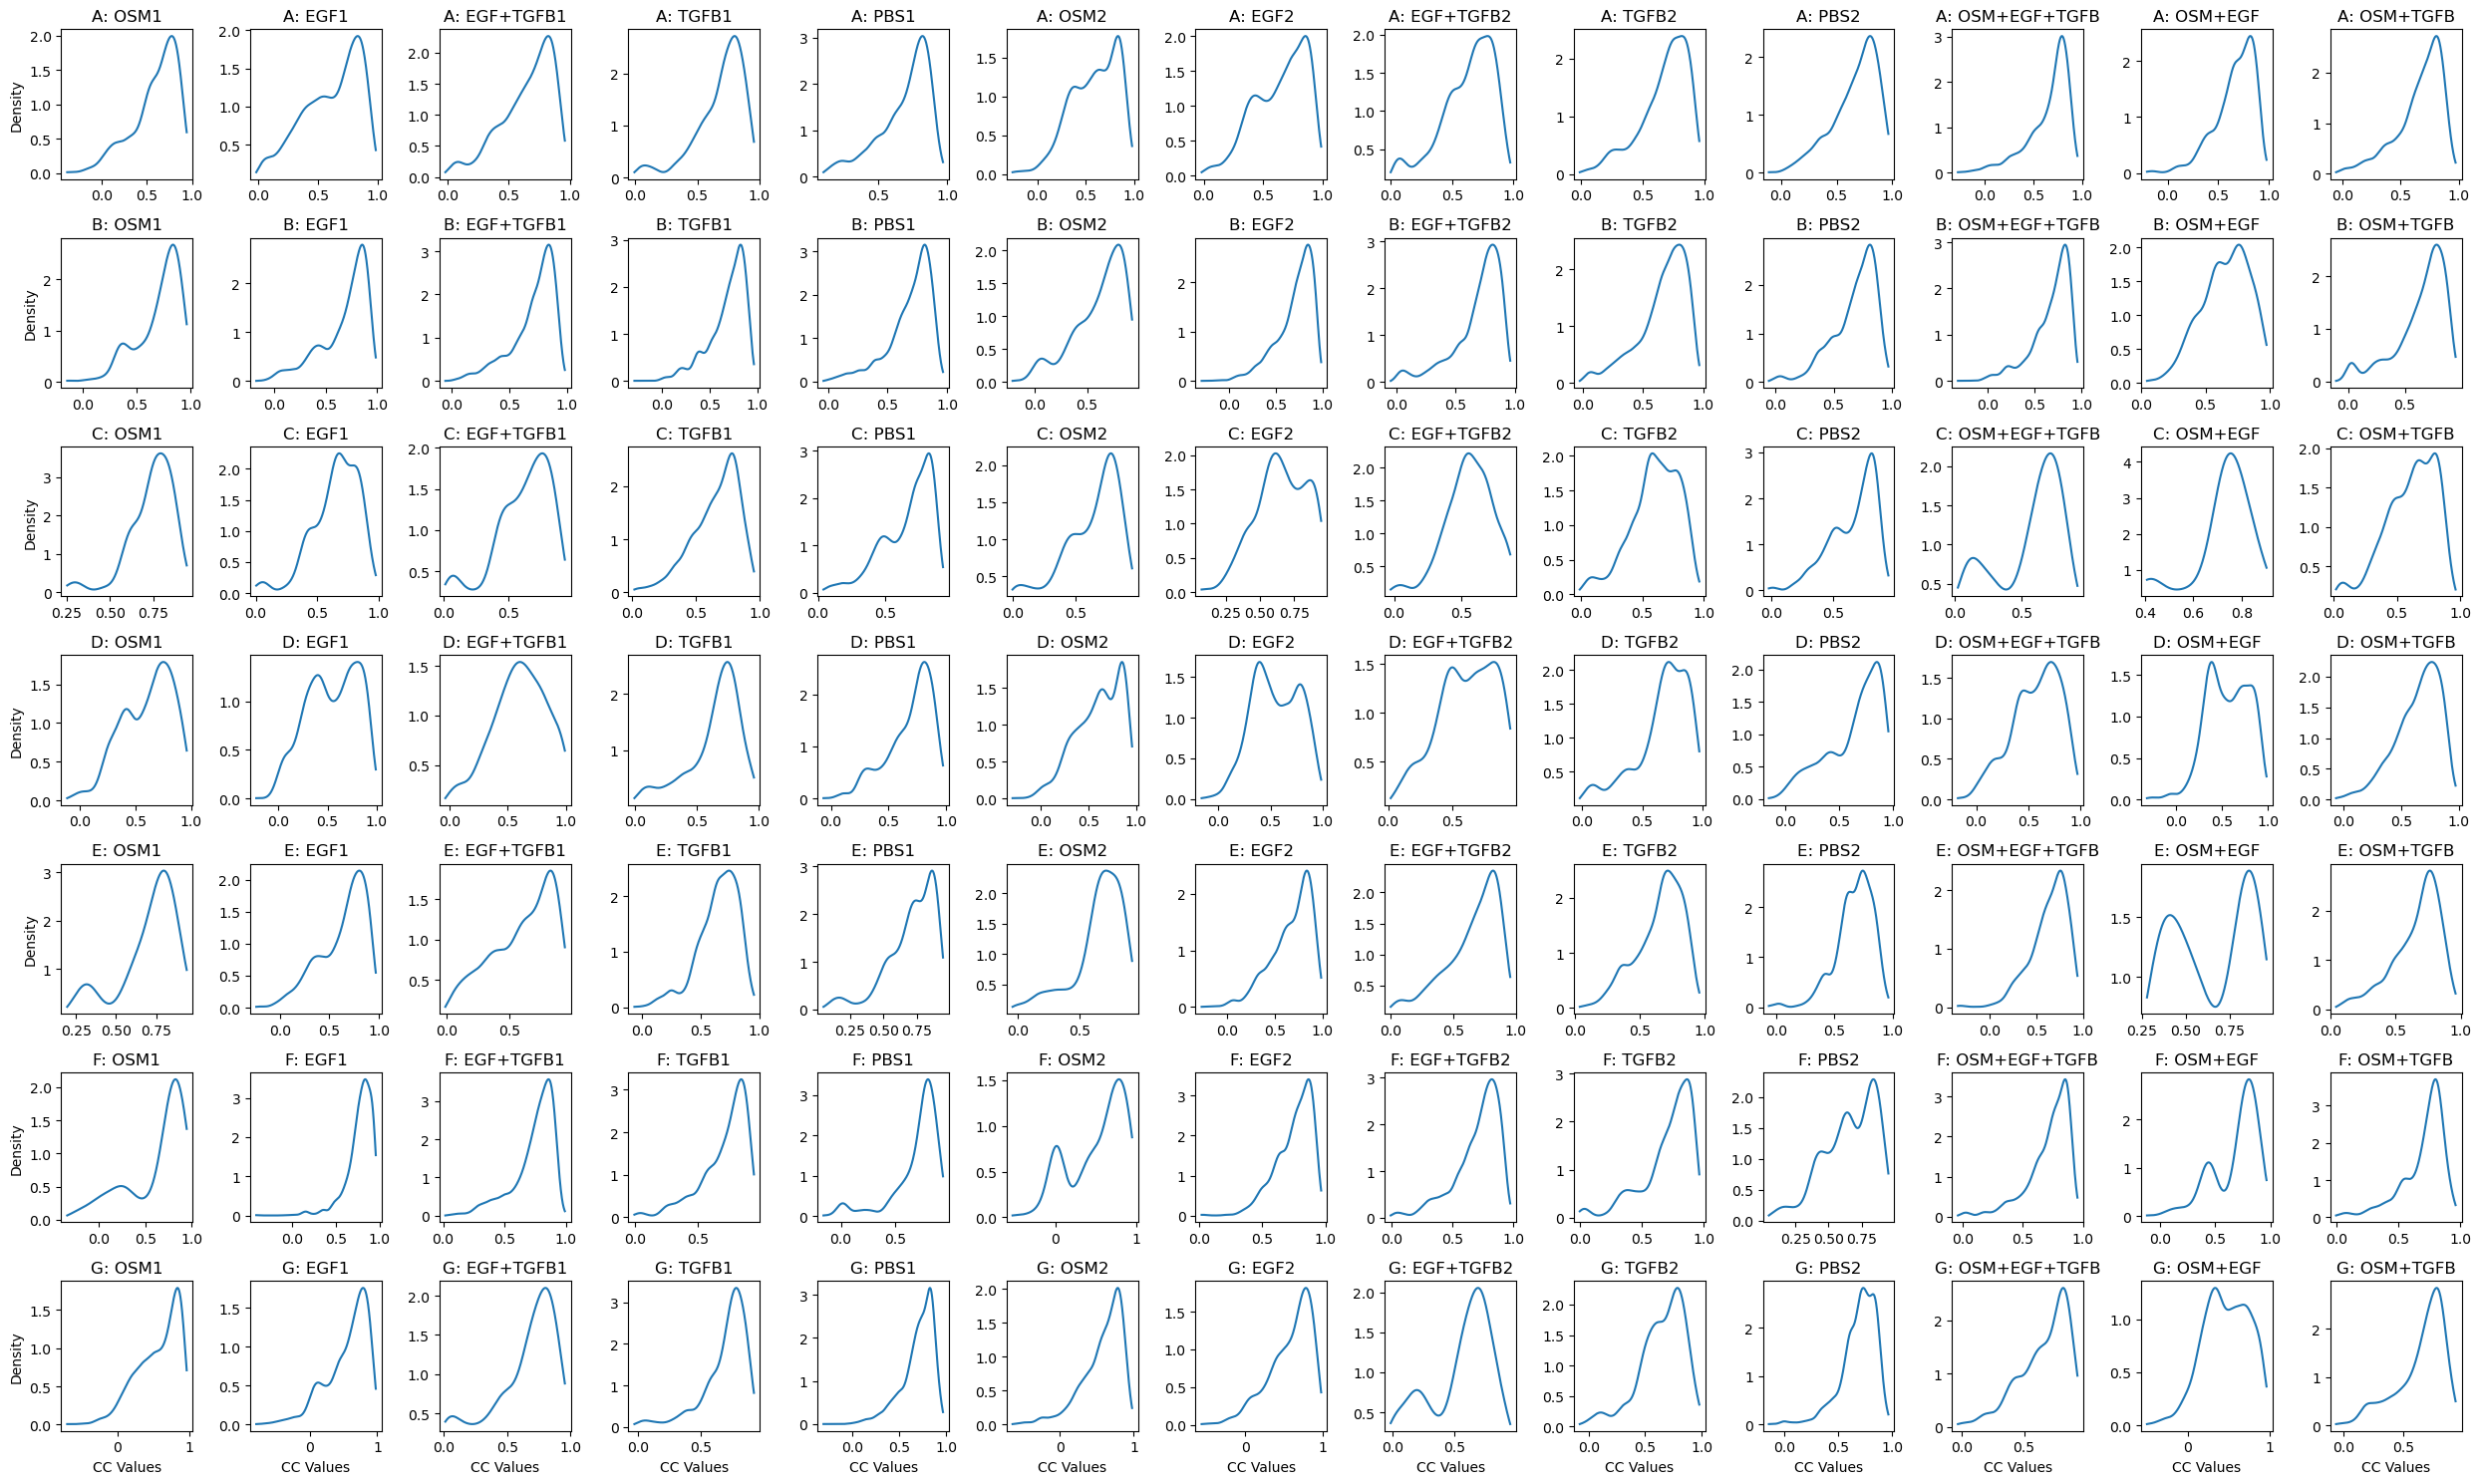

In [5]:
sample_condition = next(iter(cc_values_by_macrostate.values()))
n_states = len(sample_condition)  # Number of states
n_conditions = len(cc_values_by_macrostate)  # Number of conditions

rows = n_states  # One row per state
cols = n_conditions  # One column per condition

fig, axs = plt.subplots(rows, cols, figsize=(25, 15), squeeze=False)

for state_index, state in enumerate(sample_condition.keys()):
    for condition_index, (condition, macrostates) in enumerate(cc_values_by_macrostate.items()):
        ax = axs[state_index][condition_index]
        values = macrostates.get(state, [])
        
        if len(values) > 0:
            kde = gaussian_kde(values)
            x_range = np.linspace(min(values), max(values), 1000)
            ax.plot(x_range, kde(x_range), label=f'Cond: {condition}')
            """
            mean_x = np.mean(values)
            mean_y = kde(mean_x)
            ax.plot(mean_x, mean_y, 'o', color='k')
            ax.axvline(mean_x, color='k', linestyle='--', alpha=0.7)
            """
        ax.set_title(f'{state}: {conditions[condition_index]}')
        
        # Use label_outer() to only show outer axis labels and ticks
        #ax.label_outer()

# Manually adjust the visibility of tick labels on the outer plots only
for ax in axs[:, 0]:  # Y-axis labels on the first column
    ax.set_ylabel('Density')
for ax in axs[-1, :]:  # X-axis labels on the last row
    ax.set_xlabel('CC Values')

plt.tight_layout()
plt.show()
#plt.savefig(file_info+'States.png', bbox_inches='tight', dpi=500)
#plt.close()

In [3]:
# Calculate the averages
average_cc_values_by_state_and_condition = {}

for condition, macrostates in cc_values_by_macrostate.items():
    average_cc_values_by_state_and_condition[condition] = {}
    for state, values in macrostates.items():
        # Calculate the average for the current state under the current condition
        if len(values) > 0:
            average_cc = np.mean(values)
        else:
            average_cc = None  # or np.nan, depending on how you want to handle empty value lists
        average_cc_values_by_state_and_condition[condition][state] = average_cc

# Save as a JSON file (more human-readable, better for data interchange)
import json
with open('avrg_'+file_info+'.json', 'w') as f:
    # Convert the dictionary to a JSON string and save it
    json.dump(average_cc_values_by_state_and_condition, f, indent=4)